True


/home/ZDC/program/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ZDC/program/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


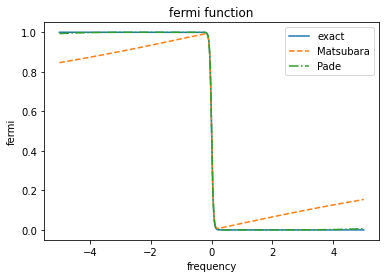

In [48]:
import numpy as np
from matplotlib import pyplot as plt 

T = 0.03 #eV
omega_sample = 5001
omega = np.linspace(-5, 5, omega_sample, dtype = np.float128)
fermi = np.zeros(omega_sample, dtype=np.float128)
fermi = 1.0/(1.0 + np.exp(omega/(T)))

#the Matsubara scheme
num_mats = 101
mats = np.linspace(-(num_mats-1)/2,(num_mats-1)/2,num_mats, dtype = np.complex128)
for i in range(num_mats):
    mats[i] = (mats[i] * 2 + 1) * np.pi * complex(0,1.0)
fermi_mats = np.zeros(omega_sample,dtype = np.complex128)
for i in range(omega_sample):
    fermi_mats[i] = 0.5
    for j in range(num_mats):
        fermi_mats[i] = fermi_mats[i] + 1.0/(mats[j] - omega[i]/T)

        
#the pade scheme
num_pade = 10
b = np.zeros(2 * num_pade)
mat_xi = np.zeros((2 * num_pade, 2 * num_pade))
mat_varsigma = np.zeros((2 * num_pade - 1, 2 * num_pade - 1))
eta = np.zeros(num_pade,dtype=complex)
pole = np.zeros(num_pade,dtype=complex)

for i in range(2 * num_pade):
    b[i] = 2 * (i) + 1

for i in range(2 * num_pade):
    for j in range(2 * num_pade):
        if (i == j-1 or i == j+1) :
            mat_xi[i][j] = 1.0 / np.sqrt(b[i] * b[j])

eigval_xi, eigvec_xi = np.linalg.eig(mat_xi) 
eigval_xi = np.sort(eigval_xi)
            
for i in range(2 * num_pade -1):
    for j in range(2 * num_pade -1):
        if (i == j-1 or i == j+1) :
            mat_varsigma[i][j] = 1.0 / np.sqrt(b[i+1] * b[j+1])

eigval_varsigma, eigvec_varsigma = np.linalg.eig(mat_varsigma)
eigval_varsigma = np.sort(eigval_varsigma)


for i in range(num_pade):
    pole[i] = (0. +2.j) / abs(eigval_xi[i])
    eigval_xi[i] = 4.0 / eigval_xi[i]**2
for i in range(num_pade-1):
    eigval_varsigma[i] = 4.0 / eigval_varsigma[i]**2


for i in range(num_pade):
    eta[i] = 0.5 * num_pade * (2 * num_pade + 1)
    for j in range(i):
        eta[i] = eta[i] * (eigval_varsigma[j] - eigval_xi[i]) / (eigval_xi[j] - eigval_xi[i])
    for j in range(i+1,num_pade):
        eta[i] = eta[i] * (eigval_varsigma[j-1] - eigval_xi[i]) / (eigval_xi[j] - eigval_xi[i])
    eta[i] = (-1. +0.j) * eta[i]

fermi_pade = np.zeros(omega_sample, dtype = np.complex128)
for i in range(omega_sample):
    fermi_pade[i] = 0.5
    for j in range(num_pade):
        fermi_pade[i] = fermi_pade[i] + eta[j] / (omega[i] / T + pole[j]) + eta[j] / (omega[i] / T - pole[j])
        
plt.title("fermi function") 
plt.xlabel("frequency") 
plt.ylabel("fermi") 
plt.plot(omega, fermi, label = 'exact')
plt.plot(omega, fermi_mats, label = 'Matsubara', linestyle = '--')
plt.plot(omega, fermi_pade, label = 'Pade', linestyle = '-.')
plt.legend(loc=1)
plt.show()

/home/ZDC/program/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ZDC/program/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


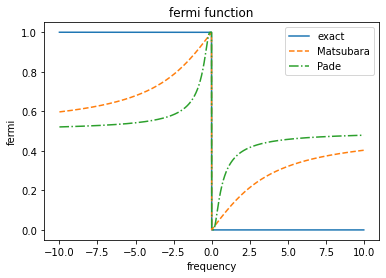

In [51]:
T = 0.001 #eV
omega_sample = 5001
omega = np.linspace(-10, 10, omega_sample, dtype = np.float128)
fermi = np.zeros(omega_sample, dtype=np.float128)
fermi = 1.0/(1.0 + np.exp(omega/(T)))

#the Matsubara scheme
num_mats = 1001
mats = np.linspace(-(num_mats-1)/2,(num_mats-1)/2,num_mats, dtype = np.complex128)
for i in range(num_mats):
    mats[i] = (mats[i] * 2 + 1) * np.pi * complex(0,1.0)
fermi_mats = np.zeros(omega_sample,dtype = np.complex128)
for i in range(omega_sample):
    fermi_mats[i] = 0.5
    for j in range(num_mats):
        fermi_mats[i] = fermi_mats[i] + 1.0/(mats[j] - omega[i]/T)

#the pade scheme
num_pade = 10
b = np.zeros(2 * num_pade)
mat_xi = np.zeros((2 * num_pade, 2 * num_pade))
mat_varsigma = np.zeros((2 * num_pade - 1, 2 * num_pade - 1))
eta = np.zeros(num_pade,dtype = np.complex128)
pole = np.zeros(num_pade,dtype = np.complex128)

for i in range(2 * num_pade):
    b[i] = 2 * (i) + 1

for i in range(2 * num_pade):
    for j in range(2 * num_pade):
        if (i == j-1 or i == j+1) :
            mat_xi[i][j] = 1.0 / np.sqrt(b[i] * b[j])

eigval_xi, eigvec_xi = np.linalg.eig(mat_xi) 
eigval_xi = np.sort(eigval_xi)
            
for i in range(2 * num_pade -1):
    for j in range(2 * num_pade -1):
        if (i == j-1 or i == j+1) :
            mat_varsigma[i][j] = 1.0 / np.sqrt(b[i+1] * b[j+1])

eigval_varsigma, eigvec_varsigma = np.linalg.eig(mat_varsigma)
eigval_varsigma = np.sort(eigval_varsigma)


for i in range(num_pade):
    pole[i] = (0. +2.j) / abs(eigval_xi[i])
    eigval_xi[i] = 4.0 / eigval_xi[i]**2
for i in range(num_pade-1):
    eigval_varsigma[i] = 4.0 / eigval_varsigma[i]**2


for i in range(num_pade):
    eta[i] = 0.5 * num_pade * (2 * num_pade + 1)
    for j in range(i):
        eta[i] = eta[i] * (eigval_varsigma[j] - eigval_xi[i]) / (eigval_xi[j] - eigval_xi[i])
    for j in range(i+1,num_pade):
        eta[i] = eta[i] * (eigval_varsigma[j-1] - eigval_xi[i]) / (eigval_xi[j] - eigval_xi[i])
    eta[i] = (-1. +0.j) * eta[i]

fermi_pade = np.zeros(omega_sample, dtype = np.complex128)
for i in range(omega_sample):
    fermi_pade[i] = 0.5
    for j in range(num_pade):
        fermi_pade[i] = fermi_pade[i] + eta[j] / (omega[i] / T + pole[j]) + eta[j] / (omega[i] / T - pole[j])
        
        
plt.title("fermi function") 
plt.xlabel("frequency") 
plt.ylabel("fermi") 
plt.plot(omega, fermi, label = 'exact')
plt.plot(omega, fermi_mats, label = 'Matsubara', linestyle = '--')
plt.plot(omega, fermi_pade, label = 'Pade', linestyle = '-.')
plt.legend(loc=1)
plt.show()

/home/ZDC/program/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/ZDC/program/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


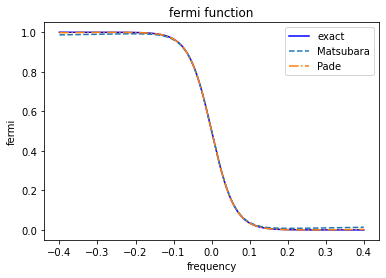

In [9]:
T = 0.001 #eV
omega_sample = 5001
omega = np.linspace(-10, 10, omega_sample, dtype = np.float128)
fermi = np.zeros(omega_sample, dtype=np.float128)
fermi = 1.0/(1.0 + np.exp(omega/(T)))

#the Matsubara scheme
num_mats = 1001
mats = np.linspace(-(num_mats-1)/2,(num_mats-1)/2,num_mats, dtype = np.complex128)
for i in range(num_mats):
    mats[i] = (mats[i] * 2 + 1) * np.pi * complex(0,1.0)
fermi_mats = np.zeros(omega_sample,dtype = np.complex128)
for i in range(omega_sample):
    fermi_mats[i] = 0.5
    for j in range(num_mats):
        fermi_mats[i] = fermi_mats[i] + 1.0/(mats[j] - omega[i]/T)

#the pade scheme
num_pade = 10
b = np.zeros(2 * num_pade)
mat_xi = np.zeros((2 * num_pade, 2 * num_pade))
mat_varsigma = np.zeros((2 * num_pade - 1, 2 * num_pade - 1))
eta = np.zeros(num_pade,dtype = np.complex128)
pole = np.zeros(num_pade,dtype = np.complex128)

for i in range(2 * num_pade):
    b[i] = 2 * (i) + 1

for i in range(2 * num_pade):
    for j in range(2 * num_pade):
        if (i == j-1 or i == j+1) :
            mat_xi[i][j] = 1.0 / np.sqrt(b[i] * b[j])

eigval_xi, eigvec_xi = np.linalg.eig(mat_xi) 
eigval_xi = np.sort(eigval_xi)
            
for i in range(2 * num_pade -1):
    for j in range(2 * num_pade -1):
        if (i == j-1 or i == j+1) :
            mat_varsigma[i][j] = 1.0 / np.sqrt(b[i+1] * b[j+1])

eigval_varsigma, eigvec_varsigma = np.linalg.eig(mat_varsigma)
eigval_varsigma = np.sort(eigval_varsigma)


for i in range(num_pade):
    pole[i] = (0. +2.j) / abs(eigval_xi[i])
    eigval_xi[i] = 4.0 / eigval_xi[i]**2
for i in range(num_pade-1):
    eigval_varsigma[i] = 4.0 / eigval_varsigma[i]**2


for i in range(num_pade):
    eta[i] = 0.5 * num_pade * (2 * num_pade + 1)
    for j in range(i):
        eta[i] = eta[i] * (eigval_varsigma[j] - eigval_xi[i]) / (eigval_xi[j] - eigval_xi[i])
    for j in range(i+1,num_pade):
        eta[i] = eta[i] * (eigval_varsigma[j-1] - eigval_xi[i]) / (eigval_xi[j] - eigval_xi[i])
    eta[i] = (-1. +0.j) * eta[i]

fermi_pade = np.zeros(omega_sample, dtype = np.complex128)
for i in range(omega_sample):
    fermi_pade[i] = 0.5
    for j in range(num_pade):
        fermi_pade[i] = fermi_pade[i] + eta[j] / (omega[i] / T + pole[j]) + eta[j] / (omega[i] / T - pole[j])
        
        
plt.title("fermi function") 
plt.xlabel("frequency") 
plt.ylabel("fermi") 
plt.plot(omega, fermi, label = 'exact')
plt.plot(omega, fermi_mats, label = 'Matsubara', linestyle = '--')
plt.plot(omega, fermi_pade, label = 'Pade', linestyle = '-.')
plt.legend(loc=1)
plt.show()